In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_excel(r'somecars1.xlsx')

In [55]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [56]:
df.shape

(32, 11)

## Scipy


In [57]:
import scipy
# print(dir(scipy))

In [58]:
from scipy.cluster.vq import kmeans, vq  # vq 

# find out centroids with the help of kmeans functions
# k, number if clusters required

centroid,_ = kmeans(df,3)

In [59]:
centroid

array([[1.70142857e+01, 7.42857143e+00, 2.76057143e+02, 1.50714286e+02,
        2.99428571e+00, 3.60142857e+00, 1.81185714e+01, 2.85714286e-01,
        0.00000000e+00, 3.00000000e+00, 2.14285714e+00],
       [2.45000000e+01, 4.62500000e+00, 1.22293750e+02, 9.68750000e+01,
        4.00250000e+00, 2.51800000e+00, 1.85431250e+01, 7.50000000e-01,
        6.87500000e-01, 4.12500000e+00, 2.43750000e+00],
       [1.46444444e+01, 8.00000000e+00, 3.88222222e+02, 2.32111111e+02,
        3.34333333e+00, 4.16155556e+00, 1.64044444e+01, 0.00000000e+00,
        2.22222222e-01, 3.44444444e+00, 4.00000000e+00]])

In [60]:
cluster_label, _ = vq(df,centroid)
cluster_label

array([1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 2, 2, 1, 1, 1, 2, 1, 2, 1])

In [61]:
cluster_df = pd.DataFrame(cluster_label,columns = ['cluster'])

In [62]:
cluster_df.head()

,cluster
0,1
1,1
2,1
3,0
4,2


In [63]:
df_concat = pd.concat([df,cluster_df], axis=1,join='inner')

In [64]:
df_concat
# now cluster no is added in the data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,2
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1


In [65]:
df_concat.groupby(['cluster']).mean().T

cluster,0,1,2
mpg,17.014286,24.500000,14.644444
cyl,7.428571,4.625000,8.000000
disp,276.057143,122.293750,388.222222
hp,150.714286,96.875000,232.111111
drat,2.994286,4.002500,3.343333
wt,3.601429,2.518000,4.161556
qsec,18.118571,18.543125,16.404444
vs,0.285714,0.750000,0.000000
am,0.000000,0.687500,0.222222
gear,3.000000,4.125000,3.444444


{(14.3, 245), (26.0, 91), (19.7, 175), (10.4, 215), (15.0, 335), (15.8, 264), (21.5, 97), (21.0, 110), (14.7, 230), (22.8, 95), (19.2, 175), (10.4, 205), (19.2, 123), (17.8, 123), (15.5, 150), (15.2, 150), (13.3, 245), (18.7, 175), (18.1, 105), (33.9, 65), (30.4, 113), (30.4, 52), (21.4, 110), (15.2, 180), (32.4, 66), (27.3, 66), (24.4, 62), (16.4, 180), (21.4, 109), (22.8, 93), (17.3, 180)}


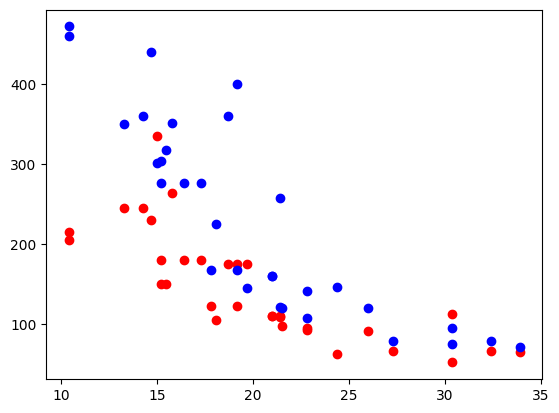

In [66]:
mapped = zip(df_concat['mpg'], df_concat['hp'])
 
print(set(mapped))
plt.scatter(df_concat['mpg'], df_concat['hp'], color = 'red')
plt.scatter(df_concat['mpg'], df_concat['disp'], color = 'blue')
